<a href="https://colab.research.google.com/github/yfhkucing/experiment_bms/blob/master/visualisasi_vxvy_154.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import joblib
import numpy as np
import pandas as pd

In [3]:
! unzip /content/models_vxvy_154_a06.zip

Archive:  /content/models_vxvy_154_a06.zip
replace content/models/model 44? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: content/models/model 44  
  inflating: content/models/model 107  
  inflating: content/models/model 43  
  inflating: content/models/model 117  
  inflating: content/models/model 25  
  inflating: content/models/model 126  
  inflating: content/models/model 100  
  inflating: content/models/model 81  
  inflating: content/models/model 68  
  inflating: content/models/model 18  
  inflating: content/models/model 75  
  inflating: content/models/model 106  
  inflating: content/models/model 102  
  inflating: content/models/model 27  
  inflating: content/models/model 59  
  inflating: content/models/model 86  
  inflating: content/models/model 112  
  inflating: content/models/model 96  
  inflating: content/models/model 4  
  inflating: content/models/model 40  
  inflating: content/models/model 136  
  inflating: content/models/model 23  
  inflating: conten

In [4]:
feature = pd.read_excel('data_model.xlsx',sheet_name='feature')
label = pd.read_excel('data_model.xlsx',sheet_name='label_154')

In [5]:
def norm(df):
  df=(df-df.min())/(df.max()-df.min())
  return df

def remap(df,new_max,new_min):
  df = (df-df.min())/(df.max()-df.min())*(new_max - new_min) + new_min
  return df

'''
def rescale(df,new_max,new_min):
  df = df *(new_max - new_min) + new_min
  return df
'''

from sklearn.preprocessing import StandardScaler
def standard(df):
  scaler = StandardScaler()
  df = scaler.fit_transform(df)
  return df

def rescale(df,df2):
  new_max = df2.max()
  new_min = df2.min()
  df = (df)*(new_max - new_min) + new_min
  return df

In [6]:
feature = norm(feature)

In [7]:
array_y = []
array_y_not_normal = []

for i in range(154):
  frame= label[i::154]
  frame = frame.drop(['koor_x','koor_y','Temp'],axis=1)
  array_y_not_normal.append(frame)
  frame = remap(frame,0.5,-0.5)
  array_y.append(frame)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

skor_r2=[]
mae_=[]
rmse = []
y_predict = []
y_test = []
for i in range(154):
  x = np.array(feature)
  y = np.array(array_y[i])
  model = joblib.load(f'/content/content/models/model {i}')
  y_pred = model.predict(x)
  Skor_r2 = r2(y,y_pred)
  RMSE = mse(y,y_pred,squared=False)
  MAE = mae(y,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

In [9]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y = np.array(array_y)

In [10]:
y.shape,y_predict.shape

((154, 192, 2), (154, 192, 2))

In [11]:
#error per skenario

r_squared = []
abs_error = []
sqrt_error = []
indexing = 0,1
for i in range(192):
  a = y[...,i,indexing]
  b = y_predict[...,i,indexing]
  r_squared.append(r2(a,b))
  abs_error.append(mae(a,b))
  sqrt_error.append(mse(a,b))

In [12]:
error = pd.DataFrame(r_squared,columns=['r2'])
abs_error = pd.DataFrame(abs_error,columns=['mae'])
sqrt_error = pd.DataFrame(sqrt_error,columns=['rmse'])
error = error.join(abs_error)
error = error.join(sqrt_error)

In [13]:
r2_matrix = skor_r2.reshape(11,14)
rmse_matrix = rmse.reshape(11,14)
mae_matrix = mae_.reshape(11,14)

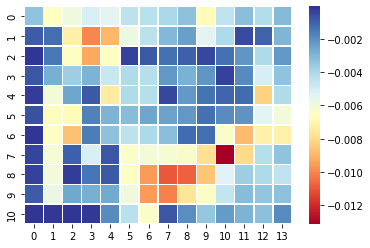

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

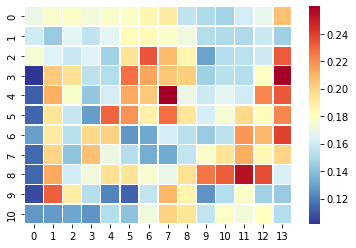

In [15]:
bx = sns.heatmap(rmse_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

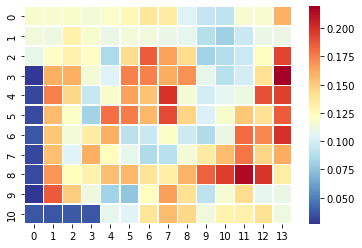

In [16]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [17]:
df_koor = pd.read_excel('data_model.xlsx',sheet_name='koordinat_154_aktual')

In [18]:
df_koor

,koor_x,koor_y
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
149,11,10
150,11,11
151,11,12
152,11,13


In [19]:
df_y = []
df_y_predict = []
for i in range(154):
  q = pd.DataFrame(y[i],columns=['Vx','Vy'])
  q = round(rescale(q,array_y_not_normal[i]),9)
  df_y.append(q)
  r = round(pd.DataFrame(y_predict[i],columns=['Vx','Vy']),9)
  r = rescale(r,array_y_not_normal[i])
  df_y_predict.append(r)

In [20]:
def kec_angin(y,scenarios):
  df_x = pd.DataFrame(y[...,scenarios,0])
  df_y = pd.DataFrame(y[...,scenarios,1])
  df_y.rename(columns={0:1},inplace=True)
  df_x = df_x.join(df_y)
  df_x = df_x.join(df_koor)
  df_x.rename(columns={0:'Vx',1:'Vy',},inplace=True)
  return df_x

In [21]:
#error per skenario

r_squared = []
abs_error = []
sqrt_error = []
indexing = 0,1
for i in range(192):
  a = kec_angin(np.array(df_y),i)
  a.drop(['koor_x','koor_y'],axis=1)
  b = kec_angin(np.array(df_y_predict),i)
  b.drop(['koor_x','koor_y'],axis=1)
  r_squared.append(r2(a,b))
  abs_error.append(mae(a,b))
  sqrt_error.append(mse(a,b))

error = pd.DataFrame(r_squared,columns=['r2'])
abs_error = pd.DataFrame(abs_error,columns=['mae'])
sqrt_error = pd.DataFrame(sqrt_error,columns=['rmse'])
error = error.join(abs_error)
error = error.join(sqrt_error)

In [22]:
error.describe()

,r2,mae,rmse
count,192.000000,192.000000,192.000000
mean,0.886890,0.017383,0.002225
std,0.067467,0.007991,0.001915
min,0.662719,0.009854,0.000481
25%,0.841538,0.010758,0.000676
50%,0.910122,0.012470,0.001317
75%,0.942774,0.024693,0.003651
max,0.958397,0.037061,0.007738


In [23]:
error[error.r2 == error.r2.max()]

,r2,mae,rmse
26,0.958397,0.00989,0.000481


In [24]:
error[error.r2 == error.r2.min()]

,r2,mae,rmse
152,0.662719,0.029115,0.00761


In [25]:
import plotly.graph_objects as go
from plotly.figure_factory import create_quiver

def tampilan_vektor(Y,scale,arrow):
  x = Y['koor_x']
  y = Y['koor_y']
  u = Y['Vx']
  v = Y['Vy']

  fig = create_quiver(x,y,u,v, scale=scale, arrow_scale=arrow)
  
  fig.show()

In [26]:
import plotly.figure_factory as ff
import plotly.graph_objs as go
import numpy as np
def tampilan_vektor_heatmap(Y):
  x = Y['koor_x']
  y = Y['koor_y']
  a = Y['Vx']
  b = Y['Vy']
  angle = np.arctan(b / a)
  norm = 0.5
  u = norm * np.cos(angle)
  v = norm * np.sin(angle)
  f = ff.create_quiver(x, y, u, v, scale = 1, scaleratio = 0.5)
  trace1 = f.data[0]
  trace2 = go.Contour(
       x = (x*1.2)-0.5,
       y = (y*1.2)-0.5,
       z = ((a**2)+(b**2))**0.5,
       colorscale = 'ylgnbu'
   )
  data=[trace1,trace2]
  fig = go.FigureWidget(data)
  fig.show()

In [27]:
def tampilan_vektor_subplot(Y):
  x = Y['koor_x']
  y = Y['koor_y']
  a = Y['Vx']
  b = Y['Vy']
  angle = np.arctan(b / a)
  norm = 0.5
  u = norm * np.cos(angle)
  v = norm * np.sin(angle)
  f = ff.create_quiver(x, y, u, v, scale = 1, scaleratio = 0.5)
  return f

In [28]:
scenarios=0
angin_test = kec_angin(np.array(df_y),scenarios)
angin_pred = kec_angin(np.array(df_y_predict),scenarios)

In [29]:
import plotly.figure_factory as ff
import plotly.graph_objs as go
import numpy as np
def tampilan_vektor_heatmap(Y,colorscale):
  x = Y['koor_x']
  y = Y['koor_y']
  a = Y['Vx']
  b = Y['Vy']
  angle = np.arctan(b / a)
  norm = 1
  u = norm * np.cos(angle)
  v = norm * np.sin(angle)
  f = ff.create_quiver(x, y, u, v, scale = 1, scaleratio = 0.5)

  # misal heatmapnya kurang pas coba geser posisi atau skalanya (persamaan di variabel x, y dalam countour)
  trace1 = f.data[0]
  trace2 = go.Contour(
       x = (x*1.05)-0.1,
       y = (y*1.12)-0.5,
       z = ((a**2)*(b**2))**0.5,
       colorscale = colorscale,
       reversescale = False
   )
  data=[trace1,trace2]
  fig = go.FigureWidget(data)
  fig.show()

In [30]:
tampilan_vektor_heatmap(angin_test,'ylgnbu')

In [31]:
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

fig1 = tampilan_vektor_subplot(angin_test)
fig2 = tampilan_vektor_subplot(angin_pred) 
 
# subplot setup
subplots = make_subplots(rows=1, cols=2)

# add all fig1.data as individual traces in fig at row=1, col=1
for d in fig1.data:
    subplots.add_trace(go.Scatter(x=d['x'], y=d['y']),
                  row=1, col=1)

# add all fig2.data as individual traces in fig at row=1, col=2
for d in fig2.data:
    subplots.add_trace(go.Scatter(x=d['x'], y=d['y']),
                  row=1, col=2)
    
subplots.update_layout(showlegend=False)

subplots.add_contour( x = (angin_test['koor_x']*1.05)-0.1,
                      y = (angin_test['koor_y']*1.12)-0.5,
                      z = ((angin_test['Vx']**2)+(angin_test['Vy']**2))**0.5,
                      colorscale = 'ylgnbu',
                      row = 1, col = 1
                     )

subplots.add_contour( x = (angin_pred['koor_x']*1.05)-0.1,
                      y = (angin_pred['koor_y']*1.12)-0.5,
                      z = ((angin_pred['Vx']**2)+(angin_pred['Vy']**2))**0.5,
                      colorscale = 'ylgnbu',
                      row = 1, col = 2
                     )
subplots.show()

In [32]:
!mkdir subplot

mkdir: cannot create directory ‘subplot’: File exists


In [33]:
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

for i in range(192):
  angin_test = kec_angin(np.array(df_y),i)
  angin_pred = kec_angin(np.array(df_y_predict),i)

  fig1 = tampilan_vektor_subplot(angin_test)
  fig2 = tampilan_vektor_subplot(angin_pred) 
 
  # subplot setup
  subplots = make_subplots(rows=1, cols=2)

  # add all fig1.data as individual traces in fig at row=1, col=1
  for d in fig1.data:
      subplots.add_trace(go.Scatter(x=d['x'], y=d['y']),
                  row=1, col=1)

  # add all fig2.data as individual traces in fig at row=1, col=2
  for d in fig2.data:
      subplots.add_trace(go.Scatter(x=d['x'], y=d['y']),
                  row=1, col=2)
    
  subplots.update_layout(showlegend=False)

  subplots.add_contour( x = (angin_test['koor_x']*1.05)-0.1,
                      y = (angin_test['koor_y']*1.12)-0.5,
                      z = ((angin_test['Vx']**2)+(angin_test['Vy']**2))**0.5,
                      colorscale = 'ylgnbu',
                      row = 1, col = 1
                     )

  subplots.add_contour( x = (angin_pred['koor_x']*1.05)-0.1,
                      y = (angin_pred['koor_y']*1.12)-0.5,
                      z = ((angin_pred['Vx']**2)+(angin_pred['Vy']**2))**0.5,
                      colorscale = 'ylgnbu',
                      row = 1, col = 2
                     )
  subplots.write_image(f'/content/subplot/fig {i}.png')

In [34]:
!zip -r /content/subplot.zip /content/subplot

  adding: content/subplot/ (stored 0%)
  adding: content/subplot/fig 149.png (deflated 5%)
  adding: content/subplot/fig 36.png (deflated 4%)
  adding: content/subplot/fig 147.png (deflated 4%)
  adding: content/subplot/fig 7.png (deflated 4%)
  adding: content/subplot/fig 33.png (deflated 4%)
  adding: content/subplot/fig 115.png (deflated 4%)
  adding: content/subplot/fig 63.png (deflated 4%)
  adding: content/subplot/fig 173.png (deflated 5%)
  adding: content/subplot/fig 109.png (deflated 4%)
  adding: content/subplot/fig 86.png (deflated 4%)
  adding: content/subplot/fig 76.png (deflated 4%)
  adding: content/subplot/fig 77.png (deflated 4%)
  adding: content/subplot/fig 29.png (deflated 4%)
  adding: content/subplot/fig 153.png (deflated 5%)
  adding: content/subplot/fig 182.png (deflated 4%)
  adding: content/subplot/fig 127.png (deflated 3%)
  adding: content/subplot/fig 45.png (deflated 4%)
  adding: content/subplot/fig 122.png (deflated 3%)
  adding: content/subplot/fig 79.pn